<a href="https://colab.research.google.com/github/nikhilbansal23/DeliveryMarketModelling/blob/main/Delivery_Market_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [71]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Delhivery - Delivery Market Modelling/delhivery_data.csv')

In [72]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [73]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

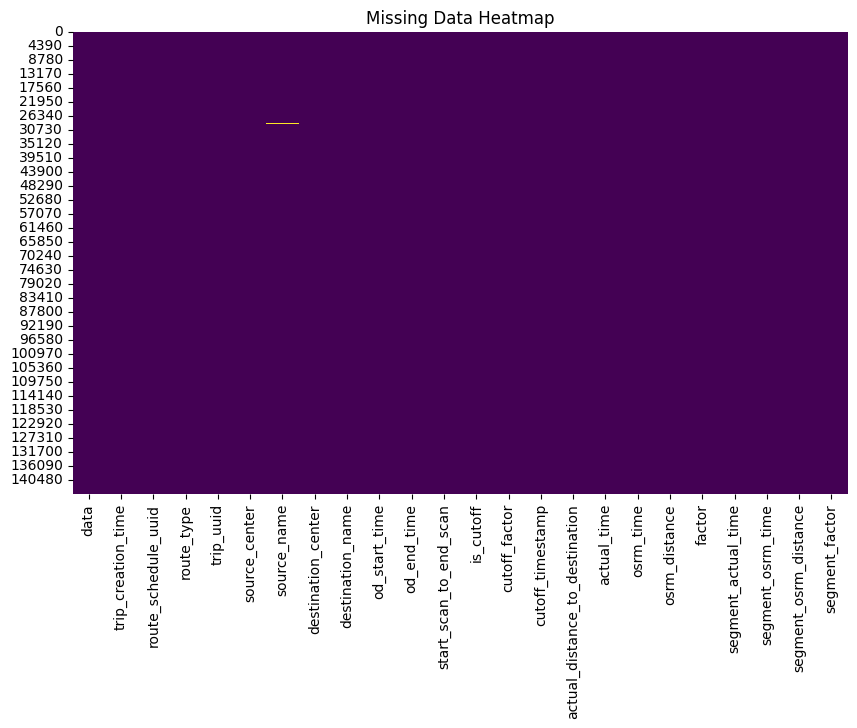

In [75]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [76]:
df['source_name'].fillna('not known', inplace=True)
df['destination_name'].fillna('not known', inplace=True)


In [77]:
df['source_states'] = df['source_name'].str.extract(r'\((.*?)\)')
df['destination_states'] = df['destination_name'].str.extract(r'\((.*?)\)')

In [78]:
df['source_cities'] = df['source_name'].str.extract(r'^([^_]+)')
df['destination_cities'] = df['destination_name'].str.extract(r'^([^_]+)')

In [79]:
# List of columns to be dropped
columns_to_drop = ['source_name', 'destination_name','route_schedule_uuid']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [80]:
df['is_cutoff'].value_counts()

True     118749
False     26118
Name: is_cutoff, dtype: int64

In [81]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [85]:
df[['od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp']] = df[['od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp']].apply(pd.to_datetime)

In [87]:
df['order_delivery_time_difference'] = df['od_end_time'] - df['od_start_time']

In [103]:
df['order_cutoff_delivery_time_difference'] = (df['cutoff_timestamp'] - df['od_end_time']).abs()

In [115]:
res = df[df['od_end_time'] > df['cutoff_timestamp']]

In [118]:
res[['cutoff_timestamp','od_end_time','order_cutoff_delivery_time_difference']].head(5)

,cutoff_timestamp,od_end_time,order_cutoff_delivery_time_difference
0,2018-09-20 04:27:55.000000,2018-09-20 04:47:45.236797,0 days 00:19:50.236797
1,2018-09-20 04:17:55.000000,2018-09-20 04:47:45.236797,0 days 00:29:50.236797
2,2018-09-20 04:01:19.505586,2018-09-20 04:47:45.236797,0 days 00:46:25.731211
3,2018-09-20 03:39:57.000000,2018-09-20 04:47:45.236797,0 days 01:07:48.236797
4,2018-09-20 03:33:55.000000,2018-09-20 04:47:45.236797,0 days 01:13:50.236797


In [119]:
filtered_df = df[df['order_cutoff_delivery_time_difference'] > pd.Timedelta(hours=2)]
filtered_df.head(5)

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_states,destination_states,source_cities,destination_cities,order_delivery_time_difference,order_cutoff_delivery_time_difference,order_status
13,training,2018-09-23 06:42:06.021680,FTL,trip-153768492602129387,IND421302AAG,IND411033AAA,2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,88,2018-09-23 09:21:27,88.076599,141.0,80.0,108.3939,1.762500,23.0,14.0,17.2476,1.642857,Maharashtra,Maharashtra,Bhiwandi,Pune,0 days 05:02:22.344165,0 days 02:23:01.365845,order on time
14,training,2018-09-23 06:42:06.021680,FTL,trip-153768492602129387,IND421302AAG,IND411033AAA,2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,False,100,2018-09-23 08:39:31,100.708423,183.0,95.0,129.3519,1.926316,41.0,15.0,20.9580,2.733333,Maharashtra,Maharashtra,Bhiwandi,Pune,0 days 05:02:22.344165,0 days 03:04:57.365845,order on time
21,training,2018-09-13 20:44:19.424489,FTL,trip-153687145942424248,IND560099AAB,IND683511AAA,2018-09-13 23:59:56.061158,2018-09-14 13:55:58.765334,836.0,True,66,2018-09-14 10:41:26,67.734827,174.0,82.0,96.7055,2.121951,93.0,38.0,45.0744,2.447368,Karnataka,Kerala,Bengaluru,Aluva,0 days 13:56:02.704176,0 days 03:14:32.765334,order on time
22,training,2018-09-13 20:44:19.424489,FTL,trip-153687145942424248,IND560099AAB,IND683511AAA,2018-09-13 23:59:56.061158,2018-09-14 13:55:58.765334,836.0,True,88,2018-09-14 09:39:25,89.319713,236.0,119.0,132.0860,1.983193,62.0,37.0,35.3805,1.675676,Karnataka,Kerala,Bengaluru,Aluva,0 days 13:56:02.704176,0 days 04:16:33.765334,order on time
23,training,2018-09-13 20:44:19.424489,FTL,trip-153687145942424248,IND560099AAB,IND683511AAA,2018-09-13 23:59:56.061158,2018-09-14 13:55:58.765334,836.0,True,110,2018-09-14 08:49:29,110.620443,285.0,149.0,159.8228,1.912752,49.0,30.0,27.7369,1.633333,Karnataka,Kerala,Bengaluru,Aluva,0 days 13:56:02.704176,0 days 05:06:29.765334,order on time


In [107]:
df.head(5)

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_states,destination_states,source_cities,destination_cities,order_delivery_time_difference,order_cutoff_delivery_time_difference,order_status
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,Anand,Khambhat,0 days 01:26:12.818197,0 days 00:19:50.236797,order on time
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Gujarat,Gujarat,Anand,Khambhat,0 days 01:26:12.818197,0 days 00:29:50.236797,order on time
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Gujarat,Gujarat,Anand,Khambhat,0 days 01:26:12.818197,0 days 00:46:25.731211,order on time
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Gujarat,Gujarat,Anand,Khambhat,0 days 01:26:12.818197,0 days 01:07:48.236797,order on time
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Gujarat,Gujarat,Anand,Khambhat,0 days 01:26:12.818197,0 days 01:13:50.236797,order on time


In [108]:
res = df[df['source_states'] != df['destination_states']]

In [109]:
res[['order_status','od_end_time','cutoff_timestamp','order_cutoff_delivery_time_difference','order_delivery_time_difference']].head(5)
   #

,order_status,od_end_time,cutoff_timestamp,order_cutoff_delivery_time_difference,order_delivery_time_difference
19,order on time,2018-09-14 13:55:58.765334,2018-09-14 12:45:25,0 days 01:10:33.765334,0 days 13:56:02.704176
20,order on time,2018-09-14 13:55:58.765334,2018-09-14 12:15:21,0 days 01:40:37.765334,0 days 13:56:02.704176
21,order on time,2018-09-14 13:55:58.765334,2018-09-14 10:41:26,0 days 03:14:32.765334,0 days 13:56:02.704176
22,order on time,2018-09-14 13:55:58.765334,2018-09-14 09:39:25,0 days 04:16:33.765334,0 days 13:56:02.704176
23,order on time,2018-09-14 13:55:58.765334,2018-09-14 08:49:29,0 days 05:06:29.765334,0 days 13:56:02.704176


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   destination_center              144867 non-null  object        
 6   od_start_time                   144867 non-null  datetime64[ns]
 7   od_end_time                     144867 non-null  datetime64[ns]
 8   start_scan_to_end_scan          144867 non-null  float64       
 9   is_cutoff                       144867 non-null  bool          
 10  cutoff_factor                   144867 non-null  int64  